In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#Read in csv files from 3 counties in and around San Antonio as pandas dataframes. Files contain average salaries based on staff category (teaching, admin, etc.)
bexar = pd.read_csv(r'C:/Users/Tommy/Teacher_Salary_Map/Bexar_County_Salaries_2019-2020.csv', 
                    header=4)
comal = pd.read_csv(r'C:/Users/Tommy/Teacher_Salary_Map/Comal_County_Salaries_2019-2020.csv', 
                    header=4)
kendall = pd.read_csv(r'C:/Users/Tommy/Teacher_Salary_Map/Kendall_County_Salaries_2019-2020.csv', 
                    header=4)

In [3]:
#check to see if the files converted correctly to dataframes
bexar.head()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,PRE-KINDERGARTEN,5.00,281714,56343
1,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,KINDERGARTEN,23.92,1392185,58202
2,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,ELEMENTARY (GRADES 1-6),22.06,1410648,63958
3,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,MIDDLE SCHOOL (GRADES 6 - 8),14.80,858663,58030
4,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,ALL GRADE LEVELS,23.21,1326545,57162


In [4]:
comal.head()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,PRE-KINDERGARTEN,13.99,764515,54650
1,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,KINDERGARTEN,111.95,6180582,55207
2,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,ELEMENTARY (GRADES 1-6),15.26,850405,55737
3,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,MIDDLE SCHOOL (GRADES 6 - 8),68.57,3777298,55091
4,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,ALL GRADE LEVELS,115.68,6597977,57038


In [5]:
kendall.head()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,PRE-KINDERGARTEN,6.02,324559,53939
1,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,KINDERGARTEN,37.75,2116162,56062
2,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,KINDERGARTEN/ELEMENTARY (K-6),2.85,158350,55638
3,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,ELEMENTARY (GRADES 1-6),5.87,333219,56748
4,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,MIDDLE SCHOOL (GRADES 6 - 8),33.78,1862162,55120


In [7]:
#while exploring the data, came across issue that 'Charter Status' column had a space at beginning of column name
bexar.columns

Index(['Region', 'County', 'District', 'District Name', ' Charter Status',
       'Staff_Category', 'Staff', 'FTE Count', 'Total Base Pay',
       'Average Base Pay'],
      dtype='object')

In [9]:
#strip whitespace from column names
bexar.rename(columns = lambda x: x.strip(), inplace=True)
bexar.columns

Index(['Region', 'County', 'District', 'District Name', 'Charter Status',
       'Staff_Category', 'Staff', 'FTE Count', 'Total Base Pay',
       'Average Base Pay'],
      dtype='object')

In [10]:
#datasets are broken out between 'traditonal' school districts and charter schools
bexar['Charter Status'].unique()

array(['TRADITIONAL ISD/CSD', 'OPEN ENROLLMENT CHARTER'], dtype=object)

In [23]:
#function to strip the whitespace from column names,
#filter the dataframe to only traditional school districts and 'total teaching staff' since the dataset already contains the average value,
def process_teacher_df(df):
    df.rename(columns = lambda x: x.strip(), inplace=True)
    df_new = df.loc[(df['Charter Status'] == 'TRADITIONAL ISD/CSD') & (df['Staff'] == 'TOTAL TEACHING STAFF')]
    return df_new

In [24]:
#process each dataframe w/ aforementioned built function
bexar_teachers = process_teacher_df(bexar)
comal_teachers =  process_teacher_df(comal)
kendall_teachers = process_teacher_df(kendall)

In [25]:
#check results after processing
bexar_teachers.head()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
14,20,BEXAR COUNTY,15901,ALAMO HEIGHTS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,353.02,20793993,58903
172,20,BEXAR COUNTY,15911,EAST CENTRAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,589.41,33986623,57662
240,20,BEXAR COUNTY,15905,EDGEWOOD ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,603.33,34718695,57545
342,20,BEXAR COUNTY,15914,FT SAM HOUSTON ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,134.55,8112188,60292
470,20,BEXAR COUNTY,15904,HARLANDALE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,906.49,52950124,58412


In [26]:
#combine dataframes into a single dataframe
combined_teachers_df = bexar_teachers.append([comal_teachers, kendall_teachers])

In [27]:
#check results
#2 Comal Co and 2 Kendall Co districts correctly appened to end of Bexar Co dataframe
combined_teachers_df.tail()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
1494,20,BEXAR COUNTY,15912,SOUTHWEST ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,945.07,55177477,58384
14,20,COMAL COUNTY,46902,COMAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,1574.89,88187299,55996
88,13,COMAL COUNTY,46901,NEW BRAUNFELS ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,551.62,31472264,57055
15,20,KENDALL COUNTY,130901,BOERNE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,609.23,34292409,56289
84,13,KENDALL COUNTY,130902,COMFORT ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,92.69,5041327,54388


In [32]:
#read in a shapefile containing school district boundaries as a geopandas file
districts = gpd.read_file('C:/Users/Tommy/Teacher_Salary_Map/school_districts_1920/School_Districts_1920.shp')

In [33]:
#check results of geopandas conversion
districts.head()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.215480,"POLYGON ((1285305.404 1030433.676, 1285315.647..."
1,11250,Bremond ISD,Bremond,198901,198-901,198901,4811250,6,4.750537e+08,143568.863312,"POLYGON ((1319544.298 1017372.883, 1319651.605..."
2,30180,Memphis ISD,Memphis,96904,096-904,096904,4830180,4,1.729847e+09,245240.220726,"POLYGON ((956989.914 1396713.039, 956989.699 1..."
3,34380,Patton Springs ISD,Patton Springs,63906,063-906,063906,4834380,5,1.007704e+09,147094.679366,"POLYGON ((952017.469 1280637.340, 952013.837 1..."
4,00002,Spur ISD,Spur,63903,063-903,063903,4800002,3,1.369828e+09,214386.521595,"POLYGON ((939157.255 1247265.923, 938834.615 1..."


In [39]:
#convert coordinate reference system (crs) to epsg=4326 to work with Altair visualization package
districts = districts.to_crs(epsg=4326)

In [34]:
#check results with those of combined teacher dataframe, in this case using the district shown in the last row in the tail output of the teachers df above
#county names have formatting issues that would make merging difficult but we can use the district number ('District' column in teachers df, 'DISTRICT_N' column in districts df)
districts.loc[districts['NAME'] == 'Comfort ISD']

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
764,14790,Comfort ISD,Comfort,130902,130-902,130902,4814790,1,9.823011e+08,203750.975385,"POLYGON ((1118081.719 886848.012, 1118111.459 ..."


In [17]:
#split the district name at the first parentheses if any of the counties being studied are present, then return the first item and strip the whitespace
#districts['NAME'] = districts['NAME'].apply(lambda x: x.split("(")[0].strip() if ('Bexar' in x) or ('Kendall' in x) or ('Comal' in x) else x)

In [18]:
#check results
#districts.loc[districts['NAME'] == 'Northside ISD']

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
926,33120,Northside ISD,Northside (Bexar),15915,015-915,015915,4833120,1,8.197922e+08,192494.023319,"POLYGON ((-98.64944 29.70159, -98.64819 29.698..."


In [21]:
#convert district names in geopandas file to lowercase to match salary dataframes
#districts['NAME'] = districts['NAME'].str.lower()

In [44]:
#inner join to merge teachers df with districts df using the district number
merged_df = districts.merge(combined_teachers_df, how='inner', left_on='DISTRICT_N', right_on='District')

In [45]:
#check results
merged_df.head()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,...,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,36450,Randolph Field ISD,Randolph Field,15906,015-906,015906,4836450,1,1.094623e+07,17147.890644,...,20,BEXAR COUNTY,15906,RANDOLPH FIELD ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,103.52,6489947,62692
1,40920,Southside ISD,Southside,15917,015-917,015917,4840920,2,2.743154e+08,100969.329079,...,20,BEXAR COUNTY,15917,SOUTHSIDE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,358.60,21393239,59658
2,22470,Harlandale ISD,Harlandale,15904,015-904,015904,4822470,4,3.739297e+07,29496.181266,...,20,BEXAR COUNTY,15904,HARLANDALE ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,906.49,52950124,58412
3,17850,East Central ISD,East Central,15911,015-911,015911,4817850,4,5.154166e+08,139948.166341,...,20,BEXAR COUNTY,15911,EAST CENTRAL ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,589.41,33986623,57662
4,20160,Fort Sam Houston ISD,Fort Sam Houston,15914,015-914,015914,4820160,1,1.368646e+07,22974.575677,...,20,BEXAR COUNTY,15914,FT SAM HOUSTON ISD,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,134.55,8112188,60292


In [46]:
merged_df['geometry']

0     POLYGON ((-98.27613 29.54851, -98.27554 29.547...
1     POLYGON ((-98.45864 29.33533, -98.45755 29.335...
2     POLYGON ((-98.50119 29.38106, -98.50110 29.381...
3     POLYGON ((-98.25184 29.49061, -98.25176 29.490...
4     POLYGON ((-98.41580 29.48359, -98.41572 29.483...
5     POLYGON ((-98.46748 29.51944, -98.46563 29.518...
6     POLYGON ((-98.54365 29.38766, -98.54369 29.383...
7     POLYGON ((-98.77205 30.13798, -98.77177 30.135...
8     POLYGON ((-98.39331 29.67466, -98.38273 29.674...
9     POLYGON ((-98.14625 29.80027, -98.14647 29.799...
10    POLYGON ((-98.27785 30.05939, -98.27685 30.059...
11    POLYGON ((-98.61176 29.27962, -98.61153 29.279...
12    POLYGON ((-98.64944 29.70159, -98.64819 29.698...
13    POLYGON ((-98.69376 29.42105, -98.69377 29.420...
14    POLYGON ((-98.56972 30.04144, -98.56952 30.031...
15    POLYGON ((-98.44163 29.68141, -98.44108 29.680...
16    POLYGON ((-98.54321 29.44505, -98.54322 29.445...
17    MULTIPOLYGON (((-98.55059 29.48922, -98.55

In [43]:
districts['geometry']

0       POLYGON ((-96.99308 31.40669, -96.99297 31.406...
1       POLYGON ((-96.63662 31.27979, -96.63555 31.278...
2       POLYGON ((-100.46980 34.74827, -100.46980 34.7...
3       POLYGON ((-100.51818 33.70092, -100.51818 33.6...
4       POLYGON ((-100.65492 33.39905, -100.65840 33.3...
                              ...                        
1015    POLYGON ((-97.69967 26.28675, -97.70097 26.279...
1016    POLYGON ((-97.55287 26.04171, -97.55290 26.041...
1017    MULTIPOLYGON (((-97.62285 26.18275, -97.61939 ...
1018    POLYGON ((-97.16737 26.41311, -97.15650 26.375...
1019    POLYGON ((-97.28956 26.41144, -97.28811 26.407...
Name: geometry, Length: 1020, dtype: geometry

In [37]:
#check shapes of dataframes to see if all records from teachers df made it into merged df
print(combined_teachers_df.shape)
print(merged_df.shape)

(19, 10)
(19, 21)


In [ ]:
#noticed that salary dataframe had 'ft sam houston isd' 
#districts['NAME'].replace(to_replace='fort sam houston isd', value='ft sam houston isd', inplace=True)

In [47]:
alt.Chart(merged_df).mark_geoshape(fill='lightgray', stroke='white')

alt.Chart(...)

In [69]:
options = list(merged_df['NAME'].unique())
input_dropdown = alt.binding_select(options=options)
selection = alt.selection_single(on='mouseover', fields=['NAME'])
color = alt.condition(selection,
                     alt.Color('Average Base Pay:Q'),
                     alt.value('lightgray'))
San_Antonio_Teacher_Salary_Map = alt.Chart(merged_df).mark_geoshape().encode(
    color=color,
    tooltip = ['NAME', 'Average Base Pay']
).properties(
    width=800,
    height=600
).add_selection(
    selection
)


San_Antonio_Teacher_Salary_Map

alt.Chart(...)

In [66]:
print(combined_teachers_df.shape)
combined_teachers_df.tail()

(19, 10)


,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
1494,20,BEXAR COUNTY,15912,southwest isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,945.07,55177477,58384
14,20,COMAL COUNTY,46902,comal isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,1574.89,88187299,55996
88,13,COMAL COUNTY,46901,new braunfels isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,551.62,31472264,57055
15,20,KENDALL COUNTY,130901,boerne isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,609.23,34292409,56289
84,13,KENDALL COUNTY,130902,comfort isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,92.69,5041327,54388


In [96]:
districts.head()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
0,13920,chilton isd,Chilton,73901.0,073-901,073901,4813920,6.0,2.294086e+08,111898.215480,"POLYGON ((-96.99308 31.40669, -96.99297 31.406..."
1,11250,bremond isd,Bremond,198901.0,198-901,198901,4811250,6.0,4.750537e+08,143568.863312,"POLYGON ((-96.63662 31.27979, -96.63555 31.278..."
2,30180,memphis isd,Memphis,96904.0,096-904,096904,4830180,4.0,1.729847e+09,245240.220726,"POLYGON ((-100.46980 34.74827, -100.46980 34.7..."
3,34380,patton springs isd,Patton Springs,63906.0,063-906,063906,4834380,5.0,1.007704e+09,147094.679366,"POLYGON ((-100.51818 33.70092, -100.51818 33.6..."
4,00002,spur isd,Spur,63903.0,063-903,063903,4800002,3.0,1.369828e+09,214386.521595,"POLYGON ((-100.65492 33.39905, -100.65840 33.3..."


In [106]:
districts.loc[districts['NAME'] == 'ft sam houston isd']

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
570,20160,ft sam houston isd,Fort Sam Houston,15914.0,015-914,015914,4820160,1.0,1.368646e+07,22974.575677,"POLYGON ((-98.41580 29.48359, -98.41572 29.483..."


In [104]:
districts.tail()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
1015,22530,harlingen cons isd,Harlingen Cons,31903.0,031-903,031903,4822530,7.0,2.186587e+08,81902.217815,"POLYGON ((-97.69967 26.28675, -97.70097 26.279..."
1016,11680,brownsville isd,Brownsville,31901.0,031-901,031901,4811680,6.0,2.674069e+08,156806.465425,"POLYGON ((-97.55287 26.04171, -97.55290 26.041..."
1017,38790,san benito cons isd,San Benito Cons,31912.0,031-912,031912,4838790,5.0,2.644048e+08,113126.136365,"MULTIPOLYGON (((-97.62285 26.18275, -97.61939 ..."
1018,35250,point isabel isd,Point Isabel,31909.0,031-909,031909,4835250,5.0,7.999826e+08,218449.529055,"POLYGON ((-97.16737 26.41311, -97.15650 26.375..."
1019,28290,los fresnos cons isd,Los Fresnos Cons,31906.0,031-906,031906,4828290,4.0,1.258174e+09,223502.000989,"POLYGON ((-97.28956 26.41144, -97.28811 26.407..."


In [105]:
districts['NAME'].replace(to_replace='fort sam houston isd', value='ft sam houston isd', inplace=True)

In [103]:
districts.drop('fort sam houston isd', axis=0, inplace=True)

In [165]:
bexar_traditional_teachers_grouped = bexar_traditional_teachers.groupby('District Name')['Average Base Pay'].mean()

In [169]:
#bexar_traditional_grouped.loc[bexar_traditional_grouped['Staff_Category' == 'TEACHING STAFF']]
bexar_traditional_teachers_grouped = bexar_traditional_teachers_grouped.reset_index()
bexar_traditional_teachers_grouped.head()

,District Name,Average Base Pay
0,alamo heights isd,58629.400000
1,east central isd,57702.857143
2,edgewood isd,57379.187500
3,ft sam houston isd,60254.933333
4,harlandale isd,58617.933333


In [93]:
districts['NAME'] = districts['NAME'].str.lower()
districts.head()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
0,13920,chilton isd,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.215480,"POLYGON ((-96.99308 31.40669, -96.99297 31.406..."
1,11250,bremond isd,Bremond,198901,198-901,198901,4811250,6,4.750537e+08,143568.863312,"POLYGON ((-96.63662 31.27979, -96.63555 31.278..."
2,30180,memphis isd,Memphis,96904,096-904,096904,4830180,4,1.729847e+09,245240.220726,"POLYGON ((-100.46980 34.74827, -100.46980 34.7..."
3,34380,patton springs isd,Patton Springs,63906,063-906,063906,4834380,5,1.007704e+09,147094.679366,"POLYGON ((-100.51818 33.70092, -100.51818 33.6..."
4,00002,spur isd,Spur,63903,063-903,063903,4800002,3,1.369828e+09,214386.521595,"POLYGON ((-100.65492 33.39905, -100.65840 33.3..."


In [57]:
df_merged = bexar_traditional.merge(districts, how='left',
                                    left_on='District Name',
                                    right_on='NAME',
                                   indicator = True)

In [54]:
sorted(list(districts['NAME'].unique()))

['abbott isd',
 'abernathy isd',
 'abilene isd',
 'academy isd',
 'adrian isd',
 'agua dulce isd',
 'alamo heights isd',
 'alba-golden isd',
 'albany isd',
 'aldine isd',
 'aledo isd',
 'alice isd',
 'alief isd',
 'allen isd',
 'alpine isd',
 'alto isd',
 'alvarado isd',
 'alvin isd',
 'alvord isd',
 'amarillo isd',
 'amherst isd',
 'anahuac isd',
 'anderson-shiro cons isd',
 'andrews isd',
 'angleton isd',
 'anna isd',
 'anson isd',
 'anthony isd',
 'anton isd',
 'apple springs isd',
 'aquilla isd',
 'aransas county isd',
 'aransas pass isd',
 'archer city isd',
 'argyle isd',
 'arlington isd',
 'arp isd',
 'aspermont isd',
 'athens isd',
 'atlanta isd',
 'aubrey isd',
 'austin isd',
 'austwell-tivoli isd',
 'avalon isd',
 'avery isd',
 'avinger isd',
 'axtell isd',
 'azle isd',
 'baird isd',
 'ballinger isd',
 'balmorhea isd',
 'bandera isd',
 'bangs isd',
 'banquete isd',
 'barbers hill isd',
 'bartlett isd',
 'bastrop isd',
 'bay city isd',
 'beaumont isd',
 'beckville isd',
 'beev

In [90]:
#districts.loc['northside isd (bexar)', 'NAME'] = 'northside isd'
#districts.loc['edgewood isd (bexar)', 'NAME'] = 'edgewood isd'
districts.loc['fort sam houston isd', 'NAME'] = 'ft sam houston isd'

In [51]:
df_merged['District Name'].unique()

array(['alamo heights isd', 'east central isd', 'edgewood isd',
       'ft sam houston isd', 'harlandale isd', 'judson isd',
       'lackland isd', 'north east isd', 'northside isd',
       'randolph field isd', 'san antonio isd', 'somerset isd',
       'south san antonio isd', 'southside isd', 'southwest isd'],
      dtype=object)

In [141]:
districts.rename(columns={'NAME': 'District Name'}, inplace=True)

In [40]:
df_merged['_merge'].unique()

[both, left_only]
Categories (2, object): [both, left_only]

In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Region                940 non-null    int64   
 1   County                940 non-null    object  
 2   District              940 non-null    int64   
 3   District Name         940 non-null    object  
 4   Charter Status        940 non-null    object  
 5   Staff_Category        940 non-null    object  
 6   Staff                 940 non-null    object  
 7   FTE Count             940 non-null    float64 
 8   Total Base Pay        940 non-null    int64   
 9   Average Base Pay      940 non-null    int64   
 10  SDLEA10               740 non-null    object  
 11  NAME                  740 non-null    object  
 12  NAME2                 740 non-null    object  
 13  DISTRICT_N            740 non-null    float64 
 14  DISTRICT              740 non-null    object  
 15  DISTRI

In [70]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1021 entries, 0 to NAME
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SDLEA10               1020 non-null   object  
 1   NAME                  1020 non-null   object  
 2   NAME2                 1020 non-null   object  
 3   DISTRICT_N            1020 non-null   float64 
 4   DISTRICT              1020 non-null   object  
 5   DISTRICT_C            1020 non-null   object  
 6   NCES_DISTR            1020 non-null   object  
 7   COLOR                 1020 non-null   float64 
 8   Shape_area            1020 non-null   float64 
 9   Shape_len             1020 non-null   float64 
 10  geometry              1020 non-null   geometry
 11  edgewood isd (bexar)  1 non-null      object  
 12  fort sam houston isd  1 non-null      object  
dtypes: float64(4), geometry(1), object(8)
memory usage: 151.7+ KB


In [102]:
districts_merged = districts.merge(bexar_traditional, left_on='NAME',
                                  right_on='District Name', how='inner')

In [106]:
districts_merged.describe()

,DISTRICT_N,COLOR,Shape_area,Shape_len,Region,District,FTE Count,Total Base Pay,Average Base Pay
count,740.000000,740.000000,7.400000e+02,740.000000,940.0,940.000000,940.000000,9.400000e+02,940.000000
mean,15909.581081,4.137838,1.868962e+08,81220.136808,20.0,15909.919149,168.563628,8.549764e+06,63767.361702
std,4.409385,1.752609,1.520391e+08,41767.908690,0.0,4.496816,792.448302,4.198928e+07,32685.756640
min,15901.000000,1.000000,1.094623e+07,17147.890644,20.0,15901.000000,0.080000,3.365000e+03,3365.000000
25%,15907.000000,2.000000,3.739297e+07,33227.977156,20.0,15906.000000,3.000000,1.928535e+05,48641.250000
50%,15910.000000,4.000000,1.936967e+08,97006.678952,20.0,15910.000000,14.000000,7.801510e+05,59835.000000
75%,15912.000000,6.000000,2.813024e+08,113966.846833,20.0,15914.000000,60.025000,2.955385e+06,70502.250000
max,15917.000000,7.000000,5.154166e+08,139948.166341,20.0,15917.000000,13645.410000,6.744348e+08,345652.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8B7464488>]],
      dtype=object)

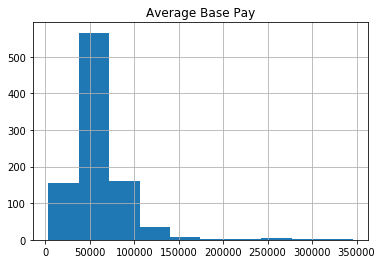

In [107]:
districts_merged.hist(column='Average Base Pay')

In [111]:
districts_merged_teachers = districts_merged.loc[districts_merged['Staff_Category'] == 'TEACHING STAFF']

In [110]:
districts.tail()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
1015,22530,harlingen cons isd,Harlingen Cons,31903.0,031-903,031903,4822530,7.0,2.186587e+08,81902.217815,"POLYGON ((-97.69967 26.28675, -97.70097 26.279..."
1016,11680,brownsville isd,Brownsville,31901.0,031-901,031901,4811680,6.0,2.674069e+08,156806.465425,"POLYGON ((-97.55287 26.04171, -97.55290 26.041..."
1017,38790,san benito cons isd,San Benito Cons,31912.0,031-912,031912,4838790,5.0,2.644048e+08,113126.136365,"MULTIPOLYGON (((-97.62285 26.18275, -97.61939 ..."
1018,35250,point isabel isd,Point Isabel,31909.0,031-909,031909,4835250,5.0,7.999826e+08,218449.529055,"POLYGON ((-97.16737 26.41311, -97.15650 26.375..."
1019,28290,los fresnos cons isd,Los Fresnos Cons,31906.0,031-906,031906,4828290,4.0,1.258174e+09,223502.000989,"POLYGON ((-97.28956 26.41144, -97.28811 26.407..."


In [111]:
combined_teachers_df.head()

,Region,County,District,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
14,20,BEXAR COUNTY,15901,alamo heights isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,353.02,20793993,58903
172,20,BEXAR COUNTY,15911,east central isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,589.41,33986623,57662
240,20,BEXAR COUNTY,15905,edgewood isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,603.33,34718695,57545
342,20,BEXAR COUNTY,15914,ft sam houston isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,134.55,8112188,60292
470,20,BEXAR COUNTY,15904,harlandale isd,TRADITIONAL ISD/CSD,TEACHING STAFF,TOTAL TEACHING STAFF,906.49,52950124,58412


In [ ]:
alt.Chart(districts).mark_geoshape().encode(
    color='Average Base Pay:Q',
    tooltip=['District Name:N', 'Average Base Pay:Q']
).transform_lookup(
    lookup='District Name',
    from_=alt.LookupData(data=combined_teachers_df, key='District Name', fields=['Average Base Pay']),
)

In [64]:
type(df_merged)

pandas.core.frame.DataFrame